In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
import xgboost as xgb
from xgboost import XGBRegressor
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)

df = pd.read_csv('jordankobelebronstats.csv', index_col = 0)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96 entries, 2003-04 to 2011-12
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     96 non-null     int64  
 1   Tm      96 non-null     object 
 2   Lg      96 non-null     object 
 3   Pos     96 non-null     object 
 4   GP      96 non-null     int64  
 5   GS      96 non-null     int64  
 6   MP      96 non-null     int64  
 7   FG      96 non-null     int64  
 8   FGA     96 non-null     int64  
 9   FG%     96 non-null     float64
 10  3P      96 non-null     int64  
 11  3PA     96 non-null     int64  
 12  3P%     96 non-null     float64
 13  2P      96 non-null     int64  
 14  2PA     96 non-null     int64  
 15  2P%     96 non-null     float64
 16  eFG%    96 non-null     float64
 17  FT      96 non-null     int64  
 18  FTA     96 non-null     int64  
 19  FT%     96 non-null     float64
 20  ORB     96 non-null     int64  
 21  DRB     96 non-null     int64  
 22

In [3]:
jordan = df.loc[df['Player'] == 'Michael Jordan']
kobe = df.loc[df['Player'] == 'Kobe Bryant']
lebron = df.loc[df['Player'] == 'Lebron James']

<AxesSubplot:>

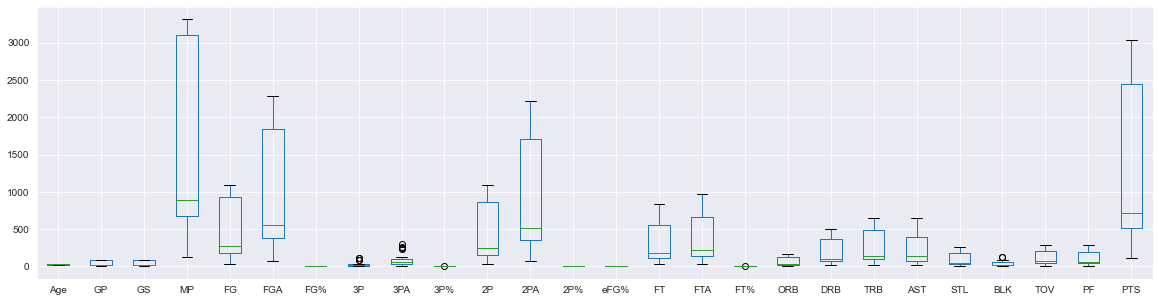

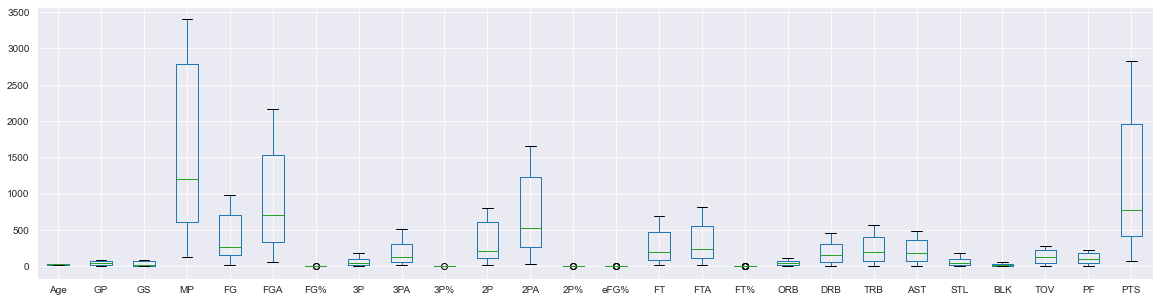

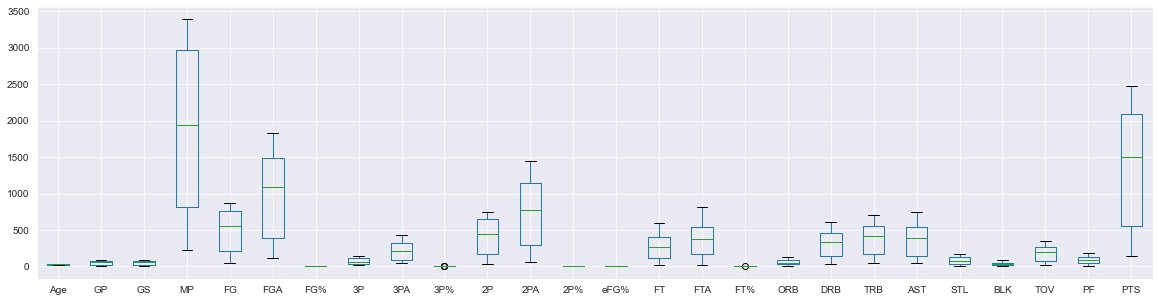

In [4]:
jordan.plot(kind='box')
kobe.plot(kind='box')
lebron.plot(kind='box')

In [7]:
dependent = df['PTS']
independent = df.iloc[:,4:27]
independent = sm.add_constant(independent)
regression_model = sm.OLS(dependent,independent).fit()

print(regression_model.summary())


                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.384e+29
Date:                Sun, 04 Jul 2021   Prob (F-statistic):               0.00
Time:                        10:09:13   Log-Likelihood:                 2456.1
No. Observations:                  96   AIC:                            -4870.
Df Residuals:                      75   BIC:                            -4816.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.684e-13   7.96e-12     -0.071      0.9

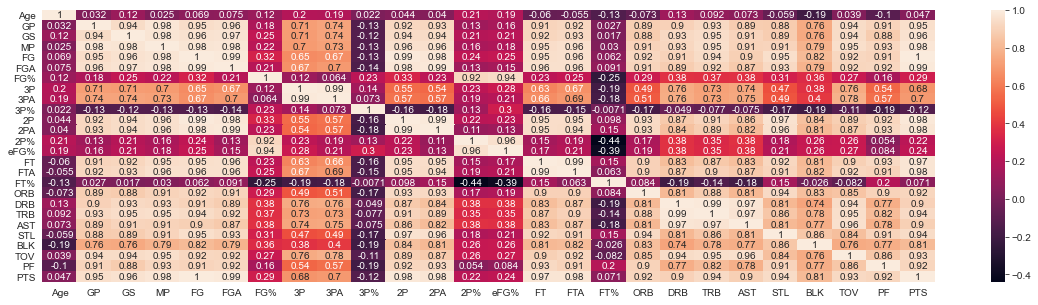

In [8]:
corrdf = df.corr()

heatmap = sns.heatmap(corrdf, annot=True)

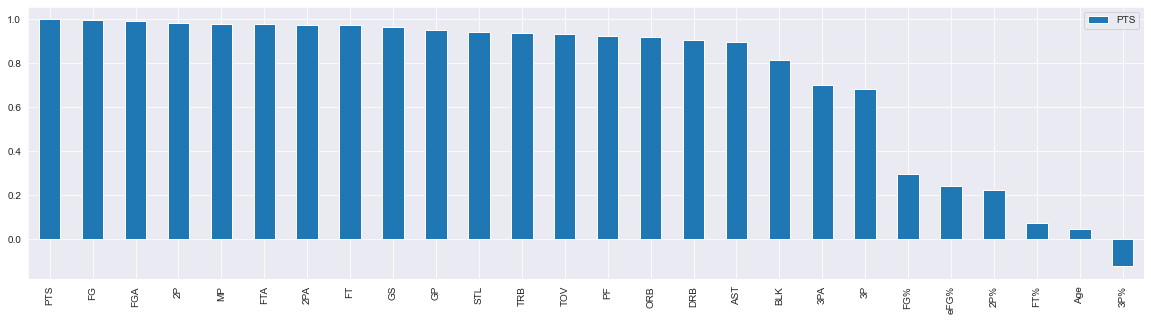

In [9]:
corrdfsort = corrdf.sort_values('PTS', ascending=False)
corrdfsort[['PTS']].plot(kind='bar')
plt.show()

In [11]:
df['PPG'] = round(df['PTS'] / df['GP'], 1)
df['RPG'] = round(df['TRB'] / df['GP'], 1)
df['APG'] = round(df['AST'] / df['GP'], 1)
df['BPG'] = round(df['BLK'] / df['GP'], 1)
df['MPG'] = round(df['MP'] / df['GP'], 1)
# Per game averages will be good statistics to have for visualizations

In [15]:
df['Pct'] = (df['FG%'] + df['eFG%'] + df['2P%'] + df['3P%'] + df['FT%']) / 5
round(df['Pct'], 3)
#Pct adds up the percentage variables to one measurement
# The percentages should be measured differently since they are different than counting totals

Season
2003-04    0.467
2004-05    0.515
2005-06    0.517
2006-07    0.503
2007-08    0.512
           ...  
2007-08    0.527
2008-09    0.533
2009-10    0.533
2010-11    0.505
2011-12    0.500
Name: Pct, Length: 96, dtype: float64

In [16]:
df['CTR'] = df['PTS'] + df['AST'] + df['BLK'] - df['TOV']
#CTR stands for contribution and it adds up points, assists, blocks, while detracting turnovers
df['CTRPG'] = round(df['CTR'] / df['GP'], 1)

In [35]:
def compare_CTR():
    subset = df.loc[:,['Player', 'CTR']].groupby('Player').mean()
    return subset
compare_CTR()
#The totals contributions favor lebron but this can be skewed by longevity

,CTR
Player,
Kobe Bryant,1221.600000
Lebron James,1523.636364
Michael Jordan,1518.392857


In [36]:
def compare_CTRPG():
    subset = df.loc[:,['Player', 'CTRPG']].groupby(['Player']).mean()
    return subset
compare_CTRPG()
# jordan has the highest contributions per game

,CTRPG
Player,
Kobe Bryant,26.568571
Lebron James,32.290909
Michael Jordan,35.060714


In [37]:
def compare_Pct():
    subset = df.loc[:,['Player', 'Pct']].groupby(['Player']).mean()
    return subset
compare_Pct()
# lebron is a slightly more efficient player than jordan

,Pct
Player,
Kobe Bryant,0.507949
Lebron James,0.532830
Michael Jordan,0.528779


In [38]:
def compare_MPG():
    subset = df.loc[:,['Player', 'MPG']].groupby(['Player']).mean()
    return subset
compare_MPG()
# the players play around the same minutes

,MPG
Player,
Kobe Bryant,36.837143
Lebron James,39.554545
Michael Jordan,39.685714


In [47]:
def compare_CTRPGmax():
    subset = df.loc[:,['Player', 'CTRPG']].groupby(['Player', 'Season']).mean()
    return subset
compare_CTRPGmax()
# jordan has the highest contribution max

CTRPG
Player         Season        
Kobe Bryant    1996-97   7.85
               1997-98  13.20
               1998-99  21.70
               1999-00  25.05
               2000-01  32.00
               2001-02  28.85
               2002-03  33.50
               2003-04  27.15
               2004-05  30.30
               2005-06  32.95
               2006-07  33.65
               2007-08  31.95
               2008-09  31.80
               2009-10  30.50
               2010-11  25.30
               2011-12  30.45
               2012-13  30.00
               2013-14  14.70
               2014-15  24.50
               2015-16  18.60
Lebron James   2003-04  24.10
               2004-05  31.80
               2005-06  33.90
               2006-07  30.55
               2007-08  33.90
               2008-09  37.30
               2009-10  35.30
               2010-11  29.20
               2011-12  31.95
               2012-13  31.10
               2013-14  29.95
               2014-15  32.40
               2015-16  30.50
               2016-17  34.75
               2017-18  36.50
               2018-19  32.60
               2019-20  32.70
               2020-21  28.55
Michael Jordan 1984-85  33.20
               1985-86  35.15
               1986-87  40.60
               1987-88  38.80
               1988-89  38.50
               1989-90  39.20
               1990-91  36.90
               1991-92  35.95
               1992-93  37.90
               1994-95  32.10
               1995-96  32.80
               1996-97  33.35
               1997-98  32.40
               2001-02  25.80
               2002-03  22.20

In [60]:
c1 = df['RSorPO'] == 'Playoffs'
#creating a filtered frame to only view playoff records as this is where legends are made

In [62]:
dfpo = df[c1]
dfpo.head()

,Age,Tm,Lg,Pos,GP,GS,MP,FG,FGA,FG%,...,Player,RSorPO,PPG,RPG,APG,BPG,MPG,Pct,CTR,CTRPG
Season,,,,,,,,,,,,,,,,,,,,,
2005-06,21,CLE,NBA,SF,13,13,604,146,307,0.476,...,Lebron James,Playoffs,30.8,8.1,5.8,0.7,46.5,0.5136,420,32.3
2006-07,22,CLE,NBA,SF,20,20,893,166,399,0.416,...,Lebron James,Playoffs,25.0,8.0,8.0,0.5,44.6,0.4682,604,30.2
2007-08,23,CLE,NBA,SF,13,13,552,113,275,0.411,...,Lebron James,Playoffs,28.2,7.8,7.6,1.3,42.5,0.4612,428,32.9
2008-09,24,CLE,NBA,SF,14,14,580,159,312,0.510,...,Lebron James,Playoffs,35.3,9.1,7.3,0.9,41.4,0.5432,570,40.7
2009-10,25,CLE,NBA,SF,11,11,460,106,211,0.502,...,Lebron James,Playoffs,29.1,9.3,7.6,1.8,41.8,0.5438,382,34.7


In [68]:
dfpodtop = dfpo.groupby(['Player', 'Season', 'Pct', 'CTRPG'])['CTR'].mean().reset_index().sort_values('CTR', ascending=False)
top3 = dfpodtop.groupby('Player').head(3).reset_index()
print(top3)
#Inspecting the three top playoff runs for each player by total CTR, CTRPG can be skewed if the player has a sort playoff run

   index          Player   Season     Pct  CTRPG  CTR
0     27    Lebron James  2017-18  0.5600   39.8  875
1     37  Michael Jordan  1991-92  0.5528   37.3  821
2     11     Kobe Bryant  2008-09  0.5328   34.0  783
3     21    Lebron James  2011-12  0.5138   33.1  761
4     38  Michael Jordan  1992-93  0.5320   39.6  752
5     12     Kobe Bryant  2009-10  0.5334   31.9  734
6     42  Michael Jordan  1997-98  0.5052   34.3  721
7     24    Lebron James  2014-15  0.4560   35.4  709
8     10     Kobe Bryant  2007-08  0.5272   32.8  688


In [ ]:
# lebron's 2017-18 playoff run had the highest CTR and highest Pct of all of the top playoffs runs

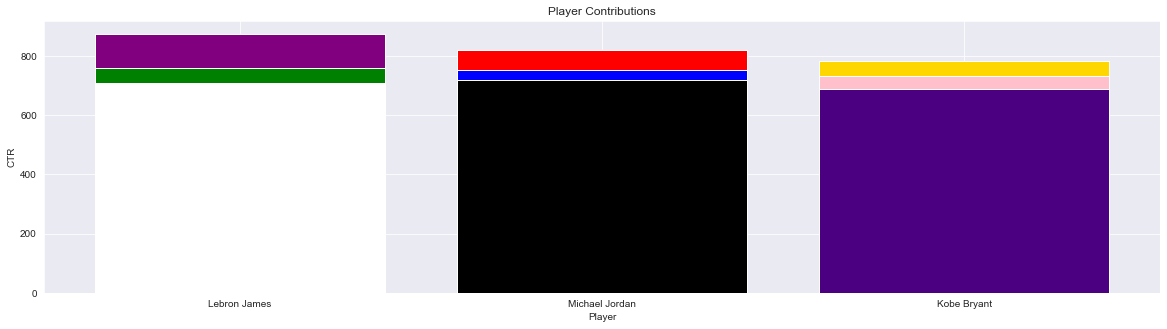

In [79]:
plt.bar(top3['Player'], top3['CTR'], color = ['purple', 'red', 'gold', 'green', 'blue', 'pink', 'black', 'white', 'indigo'])
plt.title('Player Contributions')
plt.xlabel('Player')
plt.ylabel('CTR')
plt.show()

In [83]:
dependent = df['CTR']
independent = df.iloc[:,4:27]
independent = sm.add_constant(independent)
regression_model = sm.OLS(dependent,independent).fit()


print(regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    CTR   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.926e+29
Date:                Sun, 04 Jul 2021   Prob (F-statistic):               0.00
Time:                        12:45:52   Log-Likelihood:                 2374.1
No. Observations:                  96   AIC:                            -4706.
Df Residuals:                      75   BIC:                            -4652.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.547e-13   1.87e-11     -0.024      0.9

In [84]:
df.to_csv('jordankobelebronanalyzed.csv')